Aquí lo que hicimos fue generar un nuevo Dataset a partir de nuevas coordenadas cambiando Latitud Longitud y Altura por X Y y Z
Es decir por coordenadas Cartesianas.
En el segundo intento lo que se trata de hacer es generar ese dataset nuevo, agregando el R0= 6.371E6 [m]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Utils import geo_conversions as gc
import seaborn as sns 

In [2]:
df1 = pd.read_excel("new_dataset.xlsx")
df2 = pd.read_excel("new_dataset_2da_part.xlsx")
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18102 entries, 0 to 18101
Columns: 616 entries, latitude_pos_tx to alt_200
dtypes: float64(608), int64(7), object(1)
memory usage: 85.1+ MB


In [ ]:
df["mmdd_modified"] = pd.to_datetime(df["mmdd"]+"-2010", format="%m-%d-%Y")
print(df["mmdd_modified"].head())
df["day_of_year"] = df["mmdd_modified"].dt.dayofyear
print(df["day_of_year"].head())
# Codificación cíclica 
df["mmdd_sin"] = np.sin(2 * np.pi * df["day_of_year"] / 365)
df["mmdd_cos"] = np.cos(2 * np.pi * df["day_of_year"] / 365)
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

0   2010-01-01
1   2010-01-01
2   2010-01-01
3   2010-01-01
4   2010-01-01
Name: mmdd, dtype: datetime64[ns]
0    1
1    1
2    1
3    1
4    1
Name: day_of_year, dtype: int32


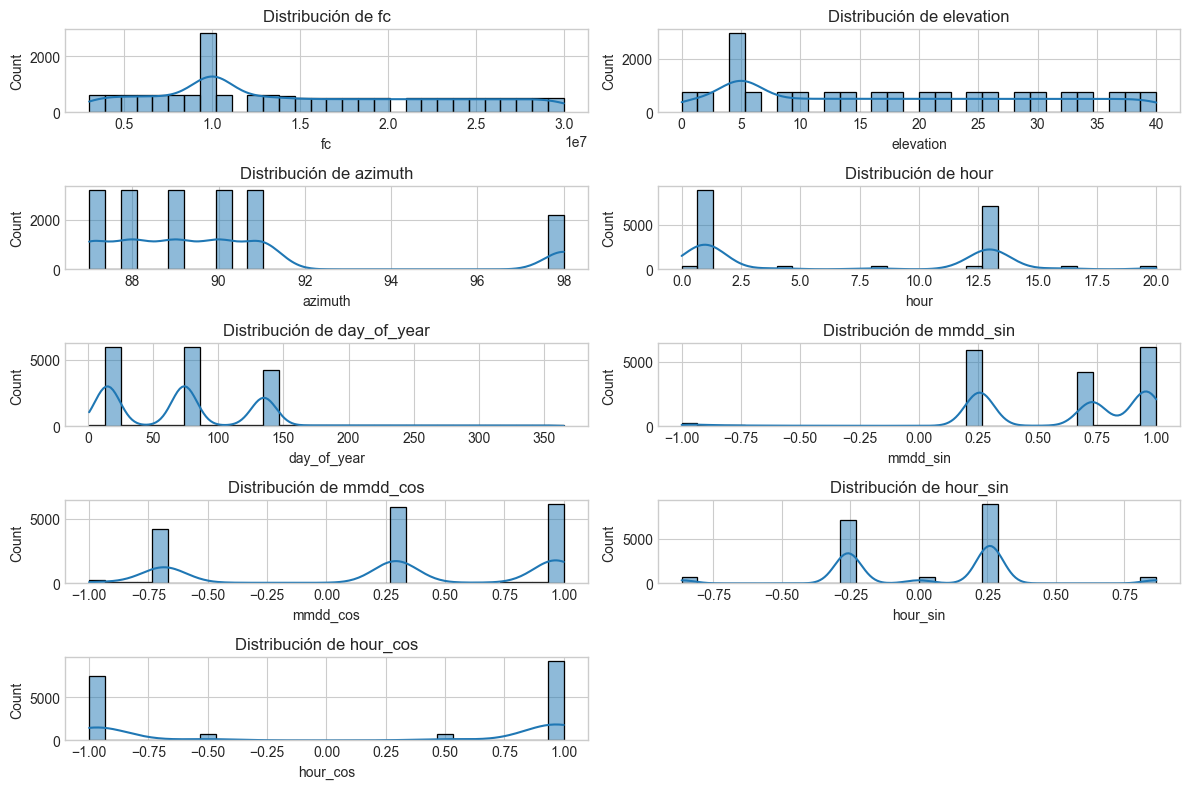

In [ ]:
# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Graficar distribuciones
for i, col in enumerate(['fc', 'elevation', 'azimuth', 'hour', 'day_of_year','mmdd_sin','mmdd_cos','hour_sin','hour_cos','mmdd_modified'], start=1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()


In [4]:
columns_to_drop = ['latitude_pos_tx','longitude_pos_tx','elevation_pos_tx','UTI','terrestrial_range','slant_range','delay']
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18102 entries, 0 to 18101
Columns: 614 entries, fc to hour_cos
dtypes: datetime64[ns](1), float64(607), int32(1), int64(5)
memory usage: 84.7 MB


In [5]:
df.head()

,fc,elevation,azimuth,year,mmdd,hour,final_latitude,final_longitude,final_elevation,lat_1,...,alt_196,alt_197,alt_198,alt_199,alt_200,day_of_year,mmdd_sin,mmdd_cos,hour_sin,hour_cos
0,10000000,5,98,2010,2010-01-01,0,-41.181310,-31.955583,0.0,-42.28,...,6.379035e+06,6.376983e+06,6.374959e+06,6.370894e+06,6371000.0,1,0.017213,0.999852,0.000000e+00,1.0
1,10000000,5,98,2010,2010-01-01,4,-40.639894,-29.116611,0.0,-42.28,...,6.376278e+06,6.374905e+06,6.373567e+06,6.372264e+06,6371000.0,1,0.017213,0.999852,8.660254e-01,0.5
2,10000000,5,98,2010,2010-01-01,8,-42.760217,-46.150045,0.0,-42.28,...,6.373571e+06,6.371952e+06,6.370825e+06,6.371856e+06,6371000.0,1,0.017213,0.999852,8.660254e-01,-0.5
3,10000000,5,98,2010,2010-01-01,12,-42.773728,-46.442465,0.0,-42.28,...,6.373501e+06,6.372859e+06,6.372225e+06,6.371600e+06,6371000.0,1,0.017213,0.999852,1.224647e-16,-1.0
4,10000000,5,98,2010,2010-01-01,16,-42.761570,-46.178233,0.0,-42.28,...,6.373576e+06,6.372921e+06,6.372272e+06,6.371568e+06,6371000.0,1,0.017213,0.999852,-8.660254e-01,-0.5


In [ ]:
# vamos a observar que tan balanceado tenemos el dataset.
cantidad = (df['elev_100'] != 0).sum()
print(f'Tenemos {cantidad} de 5130 filas que tienen como altura final distinta de cero.')
print(f'Esto equivale a {round((cantidad/5130)*100,3)}% del total del dataset.')
#ahora vamos a observar a mayor detalle considerando aquellas ultimas alturas que sean menores a 1000 metros
cantidad2 = ((df['elev_100'] != 0) & (df['elev_100'] < 1000)).sum()
print(f'Ahora la cantidad de filas que tienen una altura final distinta de cero pero menor a 1000 metros son {cantidad2} filas de las 5130 de mi dataset. ')
print(f'Sin considerar estas ultimas tenemos {round(((cantidad-cantidad2)/5130)*100,3)}% de mi dataset donde el trazo del rayo se pierde en Ionosfera.')
#Identifiquemos las filas ? 
condicion = (df['elev_100'] != 0) & (df['elev_100'] < 1000)
indices = df[condicion].index
print(f'Indices de las filas que cumplen con la condición, {(indices+2).tolist()}')


In [ ]:
# Armamos arrays con los nombres de las columnas -.- 
lat_columns = [f'lat_{i}' for i in range(1,201)]
lon_columns = [f'lon_{i}' for i in range(1,201)]
height_columns = [f'alt_{i}' for i in range(1,201)]

In [ ]:
df_lat = df[lat_columns]
df_lon = df[lon_columns]
df_heights = df[height_columns]

lat = df_lat.to_numpy()
lon = df_lon.to_numpy()
heights = df_heights.to_numpy()


In [ ]:
R0 = 6.371E6 #[m]
print("máxima Altura de mi df_heights: ",df_heights.max().max()-R0) # Con esto observo si mi height se encuentra en km o m. sabiendo que los limites de mi F2 son aprox 300km entonces la altura esta en METROS

In [ ]:
#Este bloque de codigos es solo de prueba no afecta a ninguna parte final
X1_lat = lat[1]
Y1_lon = lon[1]
Z1_h = heights[1] # [m] 
print(len(X1_lat))
print(f'Ingresa => Latitud :{X1_lat[1]}, Longitud:{Y1_lon[1]}, Altura:{Z1_h[1]}')
x1,y1,z1 = gc.transform_coords_cartesian(X1_lat,Y1_lon,Z1_h) # Aquí se pasa a coordenadas cartesianas con un R0= 1 km pasó a 6.371E6 [m]
print(f'Transf coord Cartesiana x1:{x1[1]}, y1:{y1[1]}, z:{z1[1]}')
phi_n, theta_n, rho_n = gc.transform_cartesian_to_spherical(x1,y1,z1)
print(f'phi_1: {phi_n[1]},  theta_1: {theta_n[1]}, rho_1: {rho_n[1]}[m] ')
print(f'lat_1: {np.degrees(phi_n[1])},  long_1: {np.degrees(theta_n[1])}, Altura: {rho_n[1]-R0} [m]')

In [ ]:
Alturas  = rho_n - 6.371E6
print(f'Primeras 5 Alturas: {Alturas[:5]} - Ultimas 5 Alturas: {Alturas[95:]}')
# Aca gráficas latitude Longitudes y Elevaciones
plt.figure(figsize=(15,6))
plt.plot(Alturas, label = "Altura",linestyle= 'None', marker = '.')
plt.title("Altura")
plt.legend()
# plt.ylim(-50,-38)
plt.show()

In [ ]:
# Aca gráficas latitude Longitudes y Elevaciones
plt.figure(figsize=(15,6))
plt.plot(X1_lat, label = "X",linestyle= 'None', marker = '.')
plt.title("Latitudes")
plt.legend()
plt.ylim(-50,-38)
plt.show()

In [ ]:
# Graficamos X Y Z considerando la curvatura real de la tierra.
# Graf. Alturas
plt.figure(figsize=(15,6))
plt.plot(z1, label = "Z",linestyle= 'None', marker = '.')
plt.title("coodenadas en Z")
plt.legend()
plt.show()

In [ ]:
df['fc'] = df['fc']/1E6
df = df.rename(columns = {'fc': 'fc [Mhz]'})
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc [Mhz]', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 'slant_range'
]
df_x = df[X_columns]
# Heights ingresa en metros
x,y,z = zip(*(map(lambda args: np.array(gc.transform_coords_cartesian(*args)), zip(lat, lon, heights))))

# genero el dataset para agregar 
x_columns = [f'x_{i}' for i in range(1,101)]
y_columns = [f'y_{i}' for i in range(1,101)]
z_columns = [f'z_{i}' for i in range(1,101)]
x_df = pd.DataFrame(x,columns = x_columns)
y_df = pd.DataFrame(y,columns = y_columns)
z_df = pd.DataFrame(z,columns = z_columns)
coord_df = pd.concat([df_x,x_df,y_df,z_df], axis = 1)

coord_df.head()

In [ ]:
#TOMO UN VALOR DE TODOS LOS CONVERTIDOS Y OBSERVO SI COINCIDE CON LA ORIGINAL ANTES DE CONVERTIR EN SU CONJUNTO TOTAL.
phi1,theta1,rho1= gc.transform_cartesian_to_spherical(x_df.iloc[1].to_numpy(),y_df.iloc[1].to_numpy(),z_df.iloc[1].to_numpy())
lat1,lon1, Altura1 = gc.transform_spherical_to_geographic(phi1,theta1,rho1)
Altura1=Altura1-6.371E6
plt.figure(figsize = (15,6))
plt.plot(Altura1, label = "Z",linestyle= 'None', marker = '.')
plt.plot(Z1_h,label= "z real",linestyle = 'None', marker= '.', color = 'red')
plt.title("coodenadas en Z")
plt.legend()
plt.show()
## CONFIRMAMOS QUE SE REALIZA BIEN LA TRANSFORMACIÓN EN 'Z' / ALTURA 

plt.figure(figsize=(15,6))
plt.plot(lat1,linestyle = 'None', marker= '.',color = 'blue')
plt.plot(X1_lat, linestyle = 'None', marker = 'o', color = 'red')
plt.title('Coordenadas lats')
plt.legend()
plt.show()
## TAMBIEN SE CONFIRMA LA BUENA CONVERSION PARA LATITUDES.
plt.figure(figsize = (15,6))
plt.plot(lon1,linestyle = 'None', marker= '.',color = 'blue')
plt.plot(Y1_lon, linestyle = 'None', marker = 'o', color = 'red')
plt.title('Coordenadas lon')
plt.show()

## se confirma que para las 3 coordenadas se realizaron las conversiones correctamente por lo que se puede guardar con 
# normalidad un nuevo dataset.


In [ ]:
z_columns = [f'z_{i}' for i in range(1,101)]
type(z_columns)
print(x_columns)

In [6]:
# Aquí la se realiza el guardado del nuevo dataset R0 = 6.371E6
df.to_excel('dataset/DATASET.xlsx', index = False)